In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib widget

df = pd.read_csv("eval_ckpt1250.csv")
df

,i,pos0,pos1,pos2,pos3,pos4,pos5,pos6,vel0,vel1,...,obs6,obs7,obs8,obs9,obs10,obs11,obs12,obs13,obs14,obs15
0,0,0.000230,-0.000069,0.079125,-0.183891,-0.177076,-0.018323,3.676513,0.044579,-0.013197,...,0.342506,-0.098610,0.445794,-0.131972,-1.662671,0.150492,0.367651,-0.329505,-0.944154,0.0
1,1,0.000676,-0.000198,0.076980,-0.187019,-0.156485,-0.020416,3.749290,0.044456,-0.012585,...,0.320518,-0.095602,0.444557,-0.125845,-2.582152,0.141078,0.374929,-0.329505,-0.944154,0.0
2,2,0.001014,-0.000315,0.074280,-0.188615,-0.141152,-0.022077,3.804949,-0.037111,-0.014994,...,-0.105783,0.037209,-0.371109,-0.149936,-0.753493,-0.043923,0.380495,-0.329505,-0.944154,0.0
3,3,0.000293,-0.000463,0.074400,-0.186144,-0.152081,-0.021606,3.750509,-0.073669,-0.010919,...,-0.176519,0.043036,-0.736689,-0.109193,0.215881,-0.128536,0.375051,-0.329505,-0.944154,0.0
4,4,-0.000399,-0.000540,0.074572,-0.184331,-0.162562,-0.020514,3.679456,-0.065046,-0.004474,...,-0.160754,0.056063,-0.650462,-0.044744,0.150206,-0.155291,0.367946,-0.329505,-0.944154,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,2.123157,-3.416205,0.063109,-3.124195,0.242077,-2.662041,-95.251343,-0.178968,0.035843,...,-0.436442,-0.054110,-1.789680,0.358428,0.202392,-0.200382,-9.525134,0.502568,0.864538,0.0
1996,1996,2.121424,-3.415917,0.063110,-3.128643,0.267462,-2.659237,-95.315704,-0.168121,0.021247,...,-0.412896,-0.048533,-1.681208,0.212473,-0.129715,-0.065637,-9.531570,0.502568,0.864538,0.0
1997,1997,2.119792,-3.415799,0.062895,-3.130418,0.291449,-2.656892,-95.314072,-0.157603,0.002702,...,-0.391752,-0.037831,-1.576026,0.027020,-0.287814,0.064351,-9.531407,0.502568,0.864538,0.0
1998,1998,2.118323,-3.415913,0.062542,-3.129568,0.313783,-2.654319,-95.303932,-0.138370,-0.021042,...,-0.357579,-0.056127,-1.383699,-0.210420,-0.447032,-0.018791,-9.530394,0.502568,0.864538,0.0


In [2]:
cmd = np.array([df['obs13'], df['obs14']]).T
linvel = np.array([df['vel0'], df['vel1']]).T
# /*************  ✨ Codeium Command ⭐  *************/
df['alignedvel'] = np.einsum('ij,ij->i', cmd, linvel)
df['alignedvel']

0      -0.002229
1      -0.002767
2       0.026385
3       0.034584
4       0.025658
          ...   
1995   -0.058956
1996   -0.066123
1997   -0.076870
1998   -0.087732
1999   -0.084366
Name: alignedvel, Length: 2000, dtype: float64

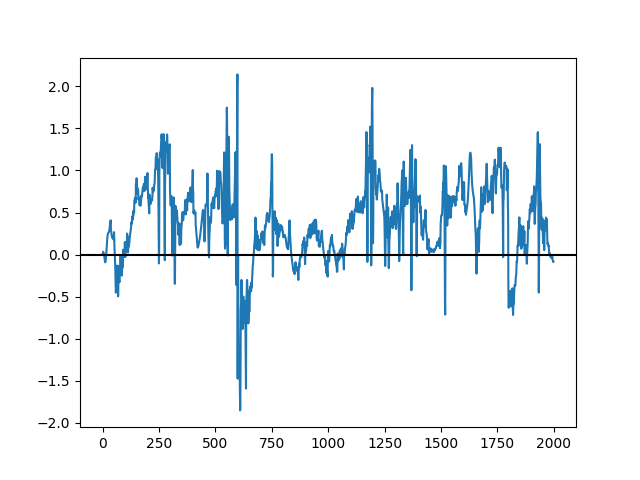

In [3]:
plt.figure()
plt.plot(df['i'], df['alignedvel'])
plt.axhline(0, color='k')


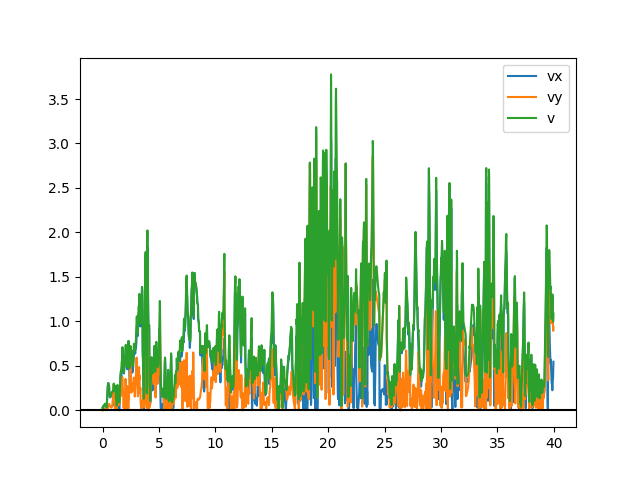

In [34]:
velnorm = np.linalg.norm(linvel, axis=1)
plt.figure()
plt.plot(df['i']*2/100., np.abs(linvel[:,0]), label='vx')
plt.plot(df['i']*2/100., np.abs(linvel[:,1]), label='vy')
plt.plot(df['i']*2/100., velnorm, label='v')
plt.axhline(0, color='k')
plt.legend()

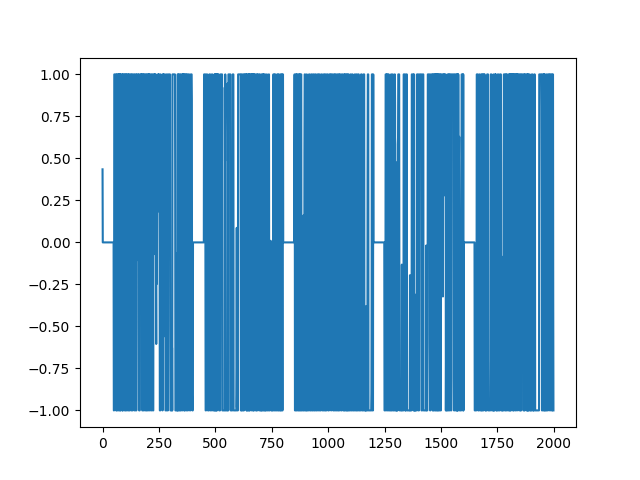

In [4]:
plt.figure()
plt.plot(df['i'], np.clip(df['action'], a_min=-1, a_max=1))